In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from matplotlib import pyplot as plt
from collections import Counter


2025-01-01 09:27:48.648147: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-01 09:27:48.650261: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-01 09:27:48.655946: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-01 09:27:48.670258: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-01 09:27:48.693716: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
version = 3 # just 3 is available
ds = tfds.load(f'speech_commands:0.0.{version}')
train = ds['train']
val = ds['validation']
test = ds['test']

2025-01-01 09:27:51.600814: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
print(train)

<_PrefetchDataset element_spec={'audio': TensorSpec(shape=(None,), dtype=tf.int16, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [4]:
for example in train.take(1):
    print(example)

{'audio': <tf.Tensor: shape=(16000,), dtype=int16, numpy=array([-15, -18, -12, ...,  16,  21,  25], dtype=int16)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=4>}


2025-01-01 09:27:52.443243: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
def plot_label_distribution(dataset,title):
    # Step 1: Extract labels from the dataset
    labels = [element['label'].numpy() for element in dataset]

    # Step 2: Count the occurrences of each label
    label_counts = Counter(labels)

    # Get the labels and their counts
    labels = list(label_counts.keys())
    counts = list(label_counts.values())

    # Step 3: Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title, size=20)
    plt.show()

2025-01-01 09:28:01.252637: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


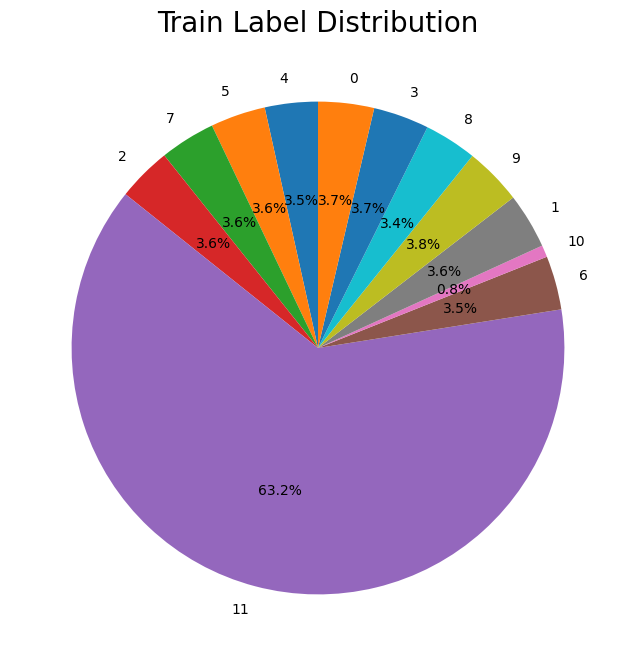

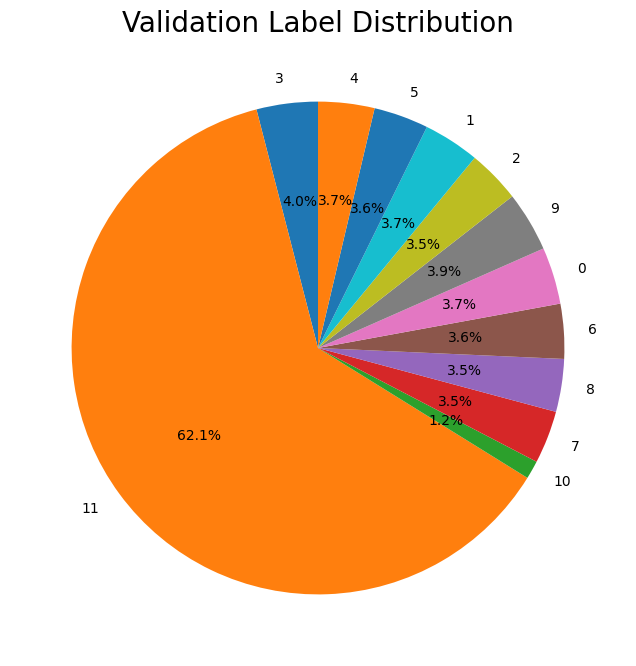

2025-01-01 09:28:03.360932: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


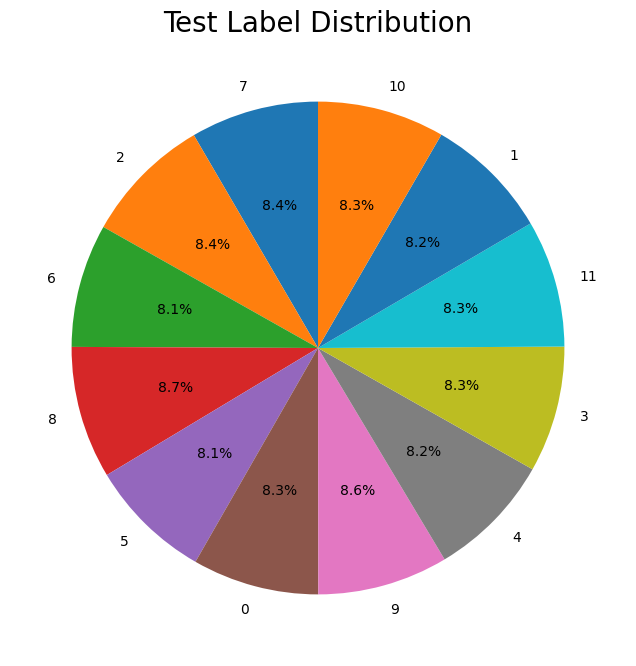

In [6]:
plot_label_distribution(train,'Train Label Distribution')
plot_label_distribution(val,'Validation Label Distribution')
plot_label_distribution(test,'Test Label Distribution')

In [7]:
def select_one_tensor_per_category(tensor_list):
    """
    Select one tensor from each category (label).
    
    Args:
    tensor_list (list of dict): A list where each element is a dictionary 
                                containing 'audio' and 'label' keys.
    
    Returns:
    list of dict: A list of selected tensors, one from each category.
    """
    category_dict = {}
    
    for item in tensor_list:
        audio = item['audio'] 
        label = item['label'].numpy()  # Convert to numpy for easier handling
        
        if label not in category_dict:
            category_dict[label] = audio
            
    selected_tensors = [{'audio': audio, 'label':tf.convert_to_tensor(label)} 
                        for label, audio in category_dict.items()]
    
    return selected_tensors


In [8]:
categorial_tensors = select_one_tensor_per_category(train)

In [9]:
print(len(categorial_tensors))

12


In [10]:


# def plot_signals_time(titles, signals):
#     nrows, ncols = 2, 6
#     fig, ax = plt.subplots(nrows, ncols, figsize=(16, 6))

#     z = 0
#     for i in range(nrows):
#         for y in range(ncols):
#             ax[i, y].set_title(titles[z])
#             ax[i, y].plot(signals[z])
#             ax[i, y].set_xticks([])
#             ax[i, y].set_yticks([])
#             ax[i, y].grid(False)
#             z += 1

#     plt.show()



def plot_signals_time(titles, signals):
    nrows, ncols = 2, 6
    fig, ax = plt.subplots(nrows, ncols, figsize=(16, 6))
    colors = ['blue'] * 6 + ['blue'] * 6  # Blue for original, red for processed

    z = 0
    for i in range(nrows):
        for y in range(ncols):
            ax[i, y].plot(signals[z], color=colors[z], linewidth=0.8)
            ax[i, y].set_title(titles[z], fontsize=10)
            # Label only the leftmost plots
            if y == 0:
                ax[i, y].set_ylabel('Amplitude', fontsize=9)
            else:
                ax[i, y].set_yticklabels([])
            # Label only the bottom plots
            if i == nrows - 1:
                ax[i, y].set_xlabel('Time (samples)', fontsize=9)
            else:
                ax[i, y].set_xticklabels([])
            z += 1

    # Set the main title
    fig.suptitle('Time-Domain Signals Before and After Preprocessing', fontsize=16)
    # Add a legend for the colors
    handles = [
        plt.Line2D([], [], color='blue', label='Original Signal'),
        plt.Line2D([], [], color='red', label='Processed Signal')
    ]
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Adjust to make space for the main title and legend
    plt.show()

def plot_one_signal(signal, title):
    plt.figure(figsize=(12, 2))
    plt.plot(signal)
    plt.title(title)
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.savefig("original_audio_signal.png")
    plt.show()

In [11]:
#sort categorial_tensors by label
categorial_tensors = sorted(categorial_tensors, key=lambda x: x['label'].numpy())

In [12]:
#get the labels,indexes from the dataset builder
info = tfds.builder(f'speech_commands:0.0.{version}').info
labels = info.features['label'].names
labels_index = info.features['label'].num_classes


In [13]:
#convert the labels to text
categorial_audio = [{'audio': item['audio'].numpy(), 'label':f'{i} ' + labels[item['label'].numpy()]} for i,item in enumerate(categorial_tensors)]

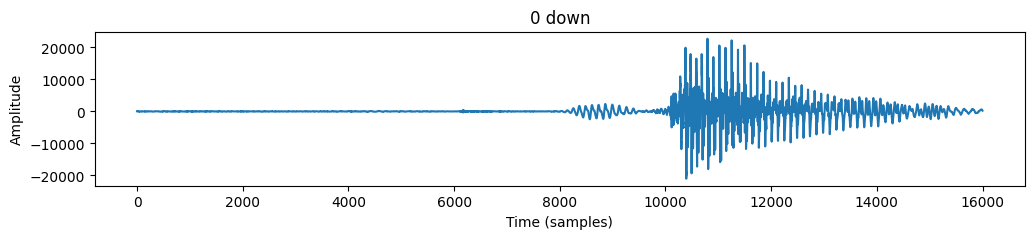

In [14]:
plot_one_signal(categorial_audio[0]['audio'],categorial_audio[0]['label'])

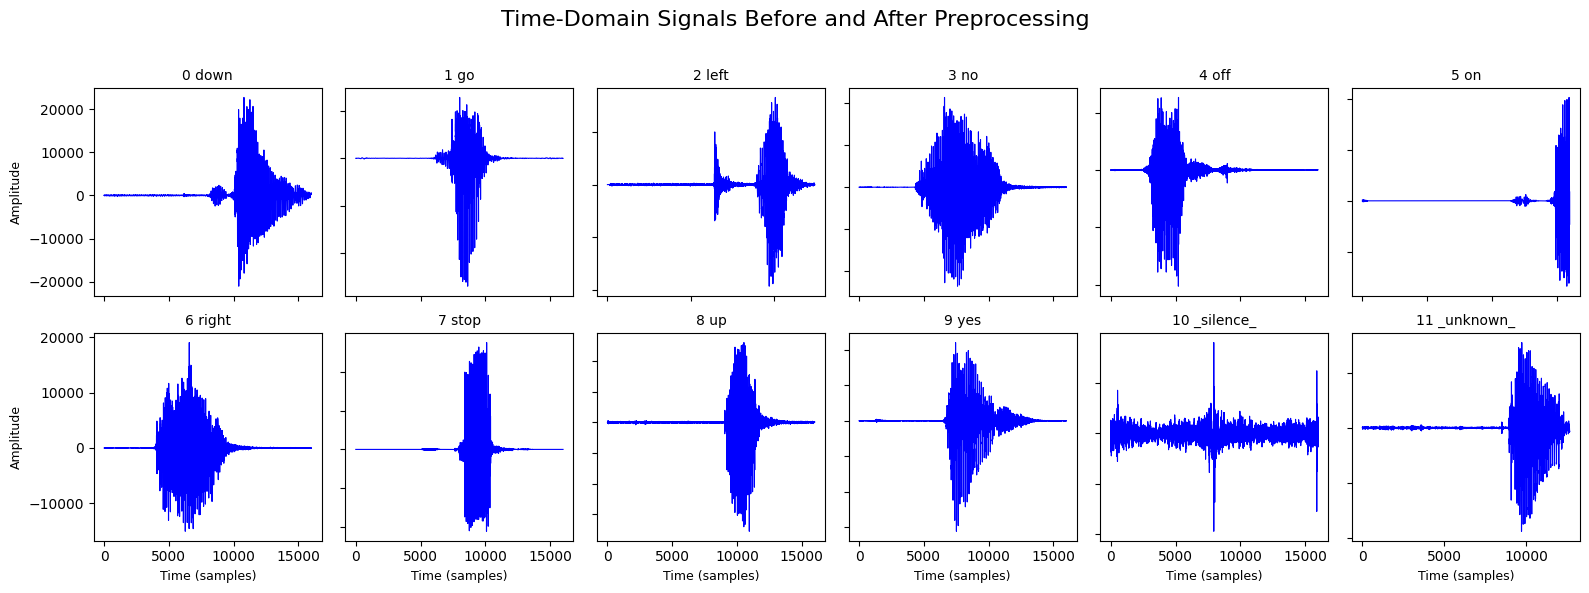

In [16]:
titles = [f'{item["label"]}' for item in categorial_audio]
signals = [item['audio'] for item in categorial_audio]
plot_signals_time(titles, signals)

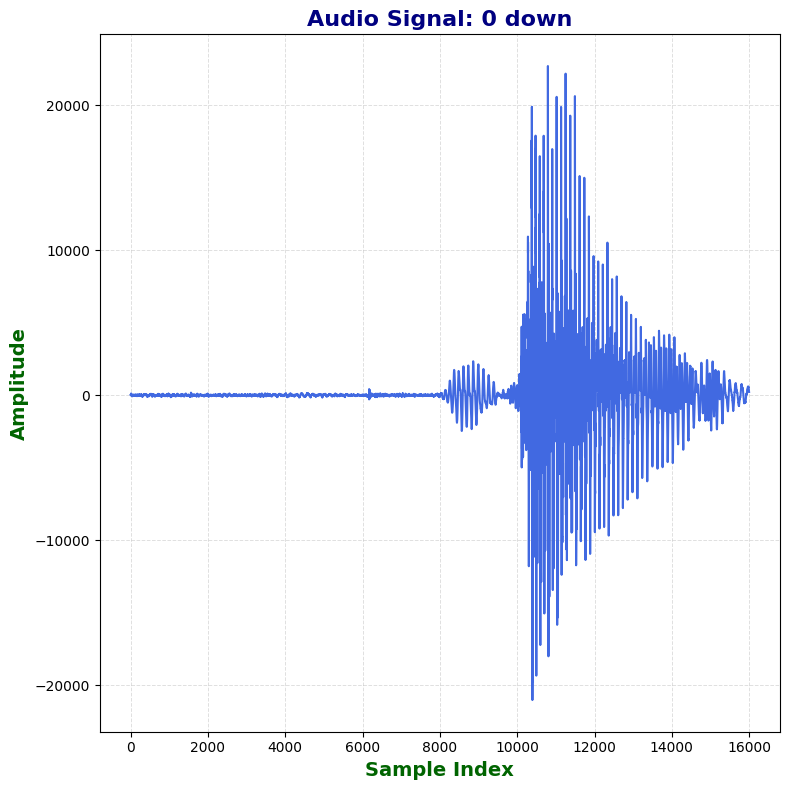

In [18]:
# Assuming `titles` and `signals` are defined
# Select the first example for plotting
example_index = 0
signal = signals[example_index]
title = titles[example_index]

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(signal, color='royalblue', linewidth=1.5)
plt.title(f'Audio Signal: {title}', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Sample Index', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Amplitude', fontsize=14, fontweight='bold', color='darkgreen')
plt.grid(alpha=0.4, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [19]:
#check that audio match the label
import IPython.display as ipd
for item in categorial_audio:
    print(item['label'])
    ipd.display(ipd.Audio(item['audio'], rate=16000))

0 down


1 go


2 left


3 no


4 off


5 on


6 right


7 stop


8 up


9 yes


10 _silence_


11 _unknown_


In [20]:
#create mel spectrogram using tfio
import tensorflow_io as tfio

def create_mel_spectrogram(audio):
    """
    Create a mel spectrogram from an audio tensor.
    
    Args:
    audio (tf.Tensor): A 1D tensor containing the audio samples.
    
    Returns:
    tf.Tensor: A 2D tensor containing the mel spectrogram.
    """
    audio = tf.cast(audio, tf.float32)
    # audio = tfio.audio.resample(audio, 16000, 8000)
    audio = audio[:16000]
    zero_padding = tf.zeros([16000] - tf.shape(audio), dtype=tf.float32)
    audio = tf.concat([audio, zero_padding], 0)
    audio = tf.signal.stft(audio, frame_length=255, frame_step=128)
    audio = tf.abs(audio)
    audio = tfio.audio.melscale(audio, rate=16000, mels=128, fmin=0, fmax=8000)
    audio = tf.math.log(audio + 1e-6)
    audio = tf.transpose(audio)
    
    return audio


In [21]:
mel_spectrograms = [create_mel_spectrogram(item['audio']).numpy() for item in categorial_tensors]

In [22]:
def plot_spectrogram(titles, signals, title, shape=(20, 10)):
    nrows, ncols = 2, 6
    fig, ax = plt.subplots(nrows, ncols, figsize=shape)
    fig.suptitle(title, size=20)
    plt.set_cmap('viridis')

    z = 0
    for i in range(nrows):
        for y in range(ncols):
            ax[i, y].set_title(titles[z])
            ax[i, y].imshow(signals[z].squeeze())
            ax[i, y].set_xticks([])
            ax[i, y].set_yticks([])
            ax[i, y].grid(False)
            z += 1

    plt.show()

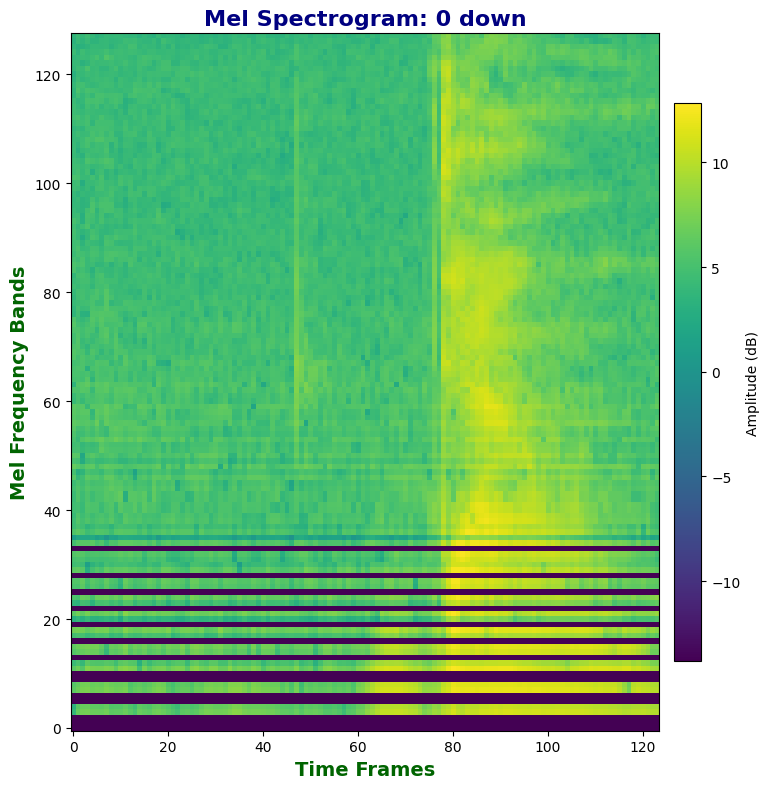

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `titles` and `mel_spectrograms` are defined
# Select the first example for plotting
example_index = 0
mel_spectrogram = mel_spectrograms[example_index]
title = titles[example_index]

# Plotting
plt.figure(figsize=(8, 8))
plt.imshow(mel_spectrogram, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Amplitude (dB)', shrink=0.8, aspect=20, pad=0.02)
plt.title(f'Mel Spectrogram: {title}', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Time Frames', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Mel Frequency Bands', fontsize=14, fontweight='bold', color='darkgreen')
plt.grid(False)  # Avoid grid lines for a clean spectrogram
plt.tight_layout()
plt.show()

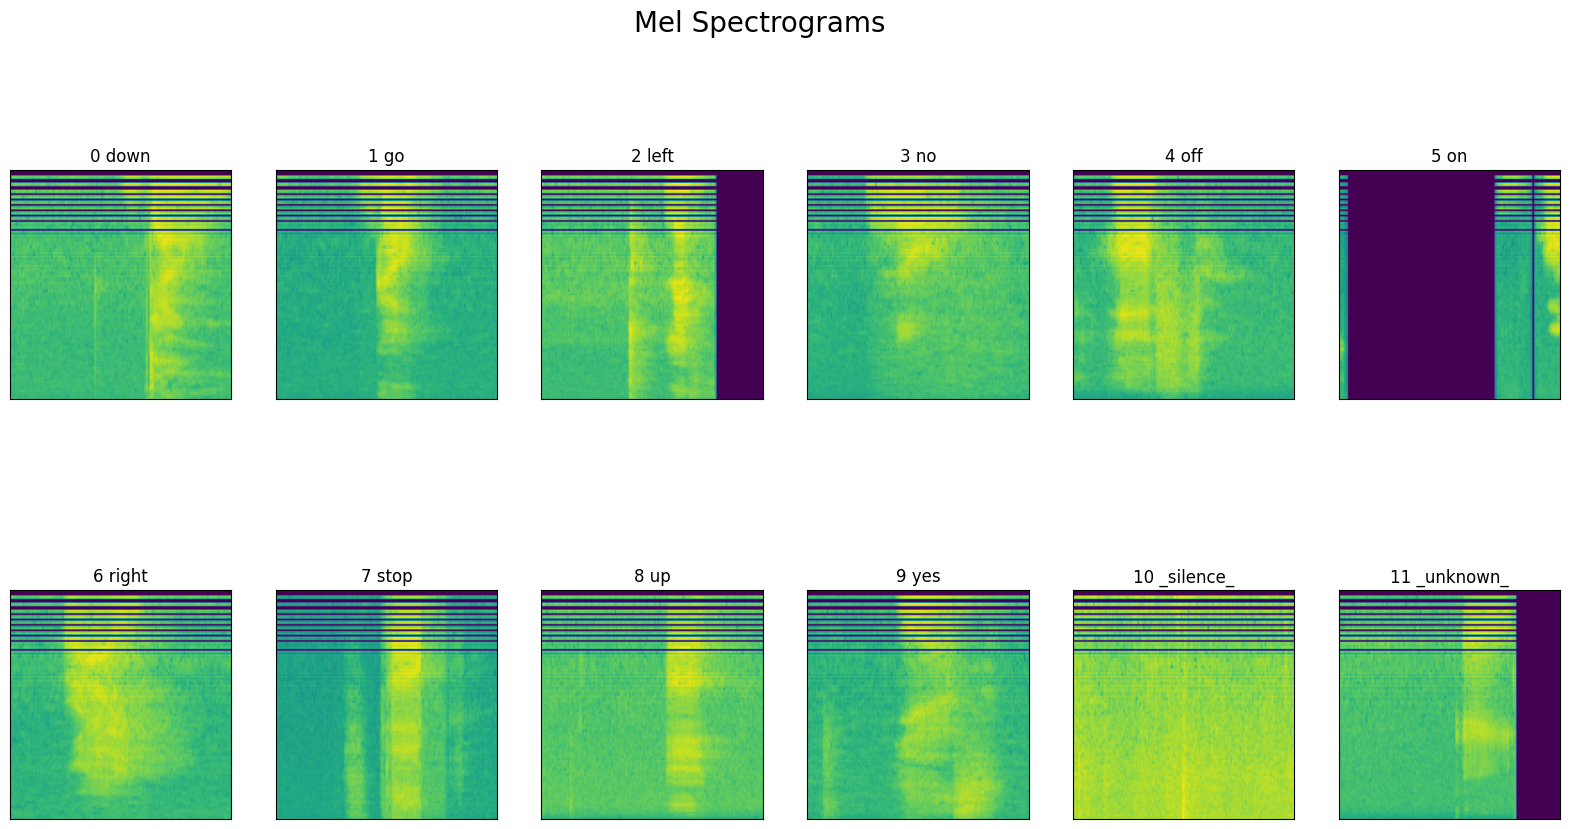

In [55]:
plot_spectrogram(titles, mel_spectrograms, 'Mel Spectrograms')

In [56]:
def create_MFCCs(audio):
    """
    Create MFCCs from an audio tensor.
    
    Args:
    audio (tf.Tensor): A 1D tensor containing the audio samples.
    
    Returns:
    tf.Tensor: A 2D tensor containing the MFCCs.
    """
    audio = tf.cast(audio, tf.float32)
    # audio = tfio.audio.resample(audio, 16000, 8000)
    audio = audio[:16000]
    zero_padding = tf.zeros([16000] - tf.shape(audio), dtype=tf.float32)
    audio = tf.concat([audio, zero_padding], 0)
    audio = tf.signal.stft(audio, frame_length=255, frame_step=128)
    audio = tf.abs(audio)
    audio = tfio.audio.melscale(audio, rate=16000, mels=128, fmin=0, fmax=8000)
    audio = tf.math.log(audio + 1e-6)
    audio = tf.transpose(audio)
    audio = tf.signal.mfccs_from_log_mel_spectrograms(audio)
    
    return audio

In [57]:
MFCCs = [create_MFCCs(item['audio']).numpy() for item in categorial_tensors]

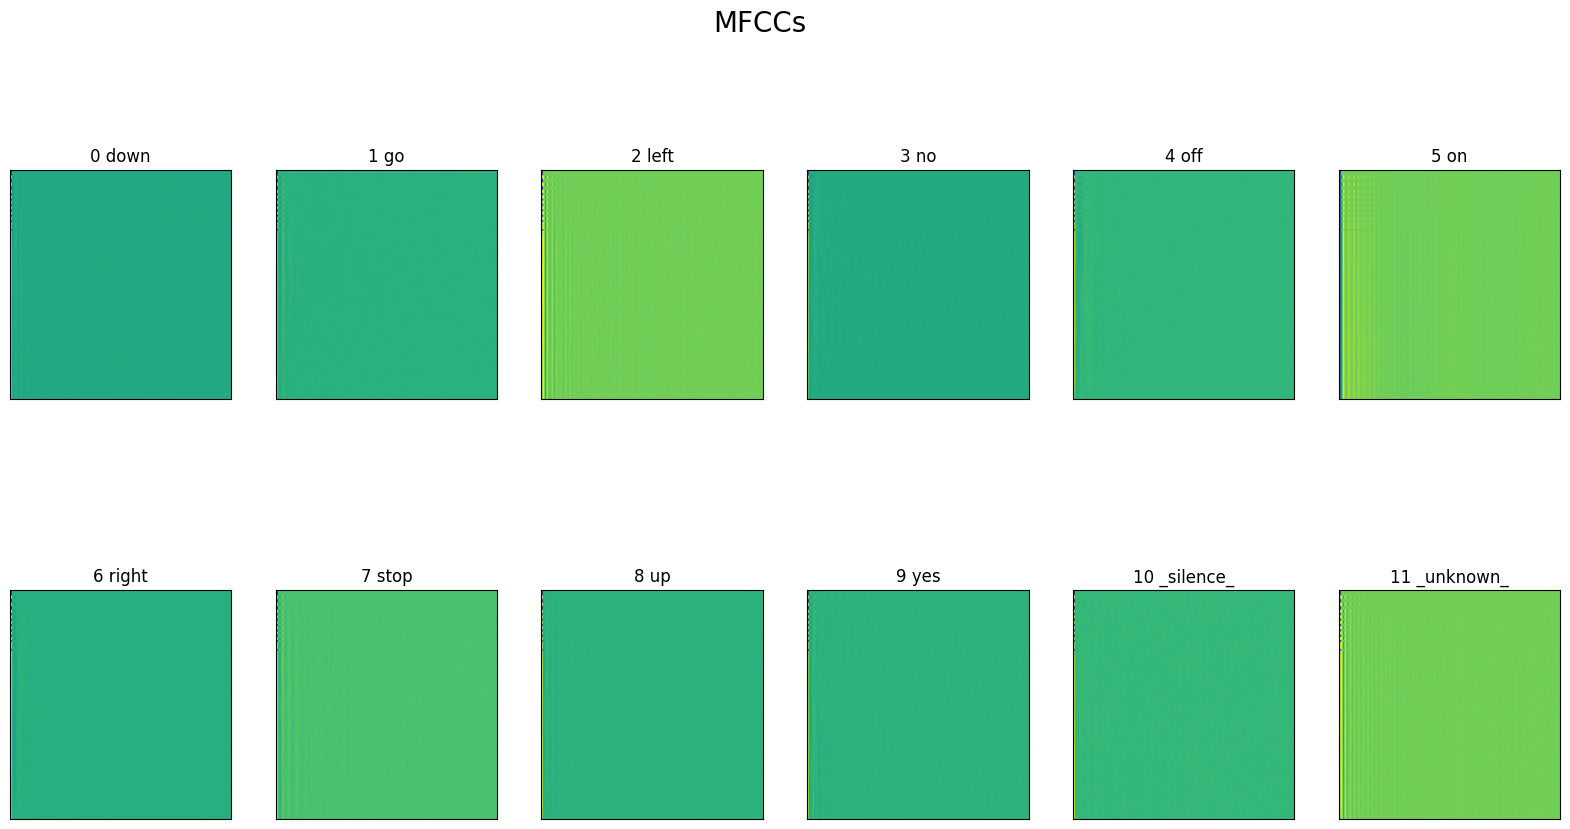

In [58]:
plot_spectrogram(titles, MFCCs, 'MFCCs', shape=(20, 10))

In [59]:
import numpy as np
from librosa.feature import melspectrogram

def create_mel_spectrogram_librosa(audio):
    """
    Create a mel spectrogram from an audio tensor using Librosa.
    
    Args:
    audio (tf.Tensor): A 1D tensor containing the audio samples.
    
    Returns:
    np.ndarray: A 2D numpy array containing the mel spectrogram.
    """
    audio = audio.numpy()
    mel_spectrogram = melspectrogram(y=audio, sr=16000, n_mels=128, fmin=0, fmax=8000)
    mel_spectrogram = np.log(mel_spectrogram + 1e-9)
    
    return mel_spectrogram

In [60]:
mel_spectrograms_librosa = [create_mel_spectrogram_librosa(tf.cast(item['audio'], tf.float32)) for item in categorial_tensors]

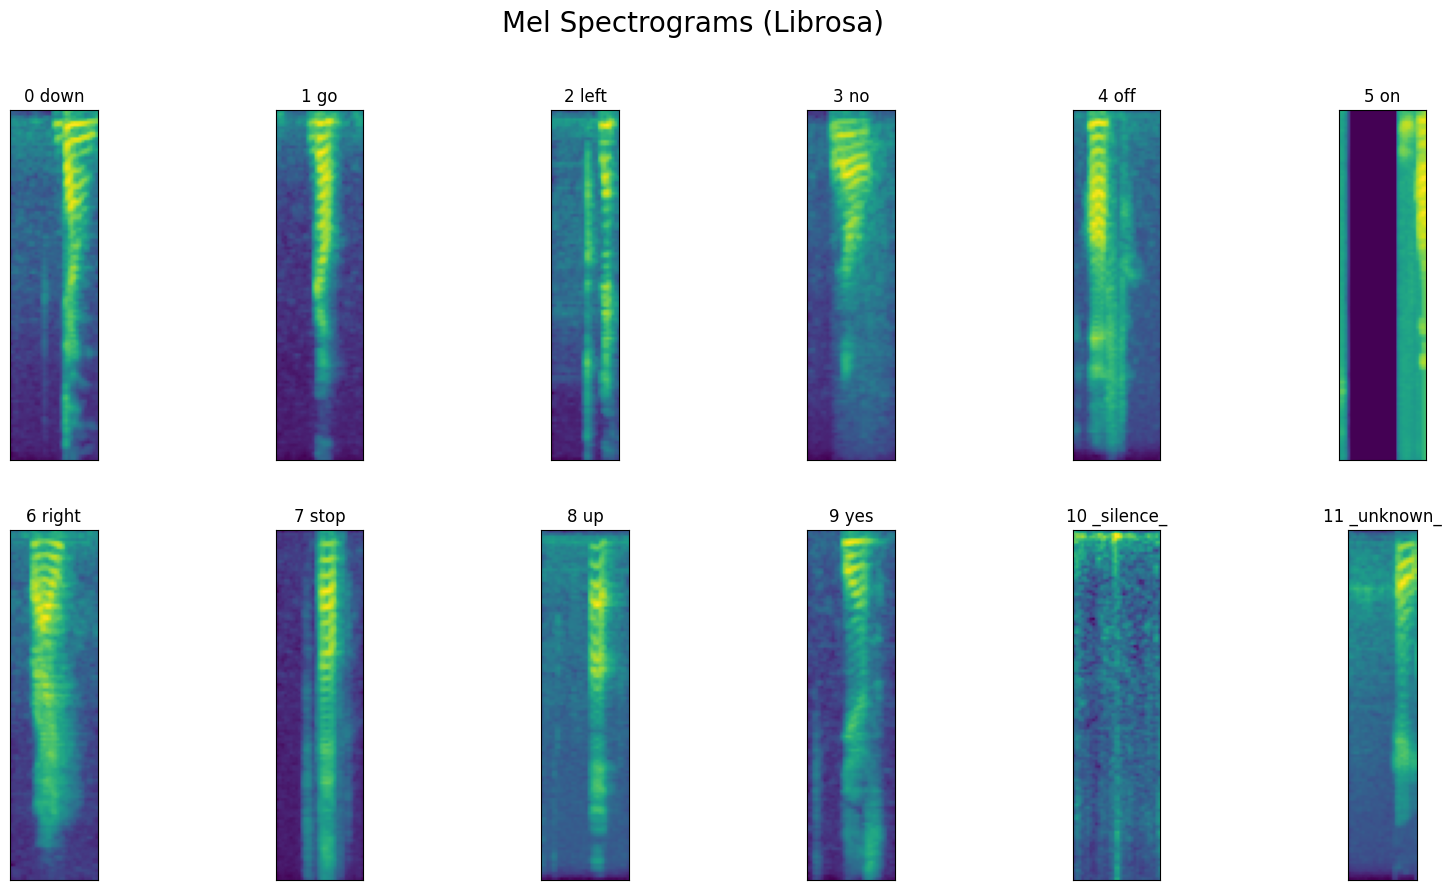

In [61]:
plot_spectrogram(titles, mel_spectrograms_librosa, 'Mel Spectrograms (Librosa)', shape=(20, 10))

In [72]:
from librosa.feature import mfcc

def create_MFCCs_librosa(audio):
    """
    Create MFCCs from an audio tensor using Librosa.
    
    Args:
    audio (tf.Tensor): A 1D tensor containing the audio samples.
    
    Returns:
    np.ndarray: A 2D numpy array containing the MFCCs.
    """
    audio = audio.numpy()
    # MFCCs = mfcc(y=audio, sr=16000, n_mfcc=13, n_mels=128, fmin=0, fmax=8000)
    MFCCs = mfcc(y=audio, sr=16000, n_mfcc=13, n_fft=400, hop_length=160, n_mels=40, fmin=0, fmax=16000)
    return MFCCs

In [73]:
MFCCs_librosa = [create_MFCCs_librosa(tf.cast(item['audio'], tf.float32)) for item in categorial_tensors]

/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


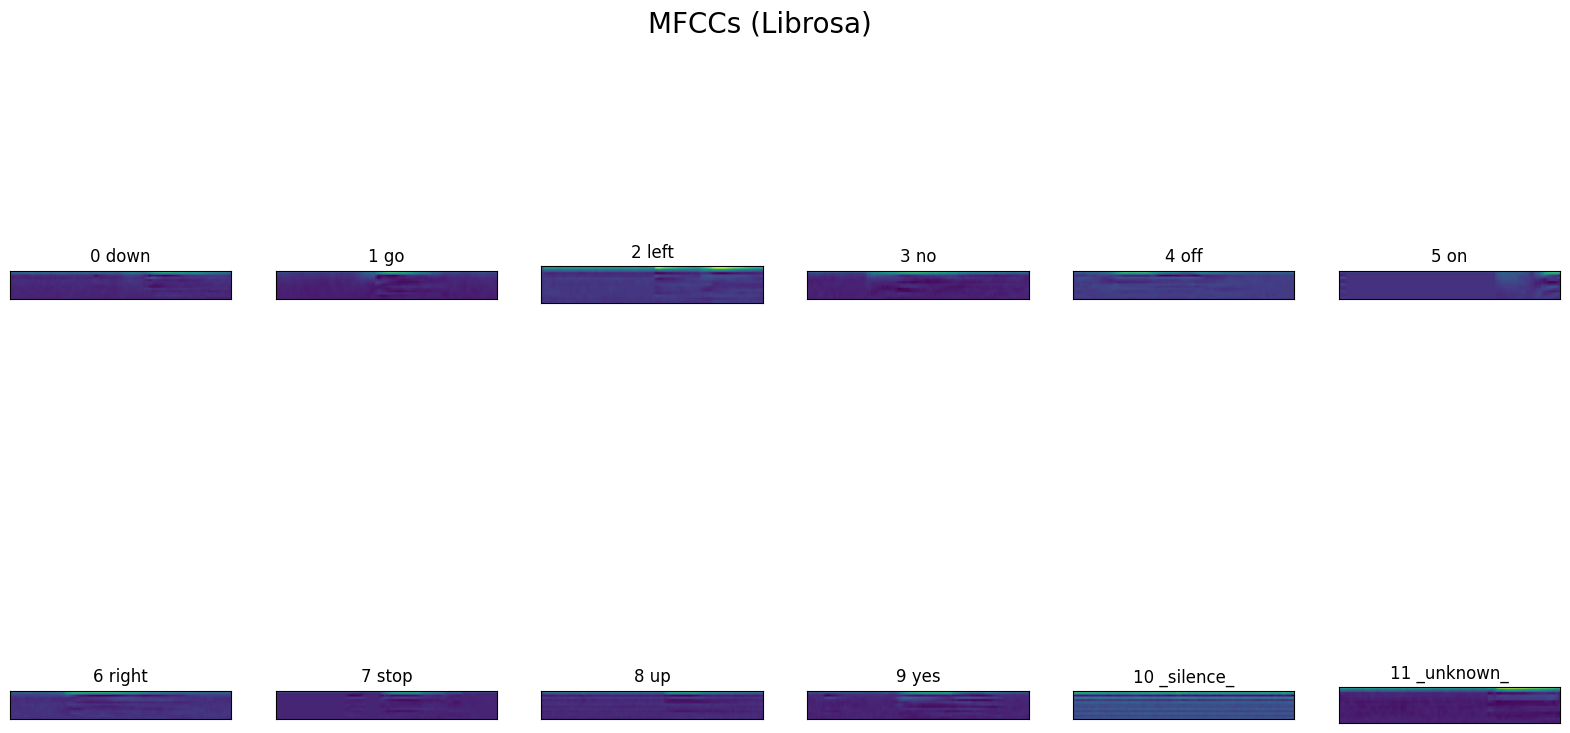

In [74]:
plot_spectrogram(titles, MFCCs_librosa, 'MFCCs (Librosa)', shape=(20, 10))

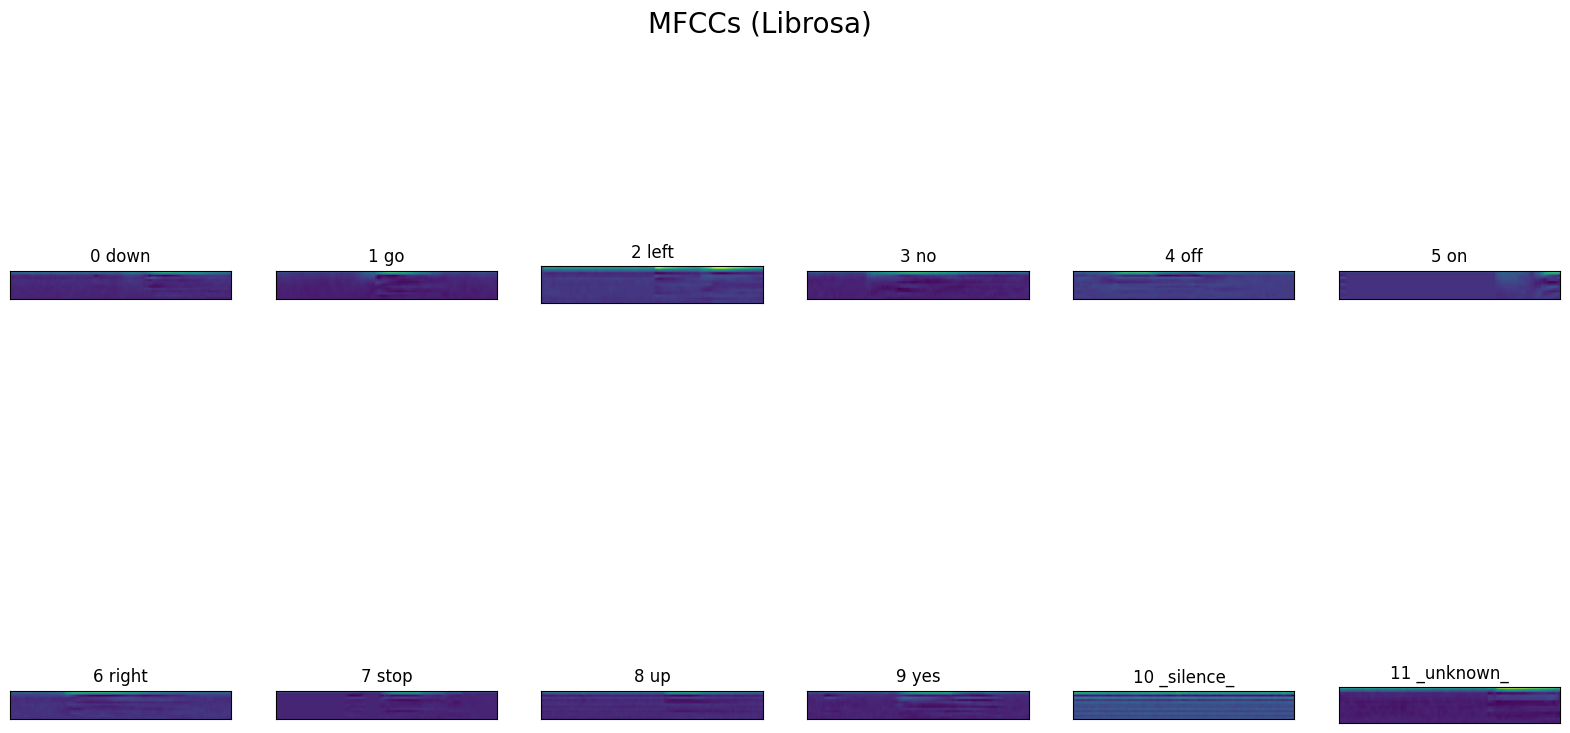

In [75]:
plot_spectrogram(titles, MFCCs_librosa, 'MFCCs (Librosa)', shape=(20, 10))

In [76]:
# custom MFCC function
# An integer representing the sampling rate.
sr = 16000
# An integer scalar Tensor. The window length in samples.
frame_length = int(sr/40) #25 ms
# An integer scalar Tensor. The number of samples to step.
frame_step = int(sr/100) #10 ms
# An integer scalar Tensor. The size of the FFT to apply.
fft_length = int(sr/40) #25 ms
# An integer representing the num of filterbanks.
num_feats = 40

def get_mfccs(
        audio,
        channels= 1,
        sample_rate= 16000,
        frame_length= 400,
        frame_step = 160,
        fft_length = 400,
        num_feats = 40
    ):
    audio = tf.cast(audio, tf.float32)

    stfts = tf.signal.stft(audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length)

    spectrograms = tf.abs(stfts)

    # Warp the linear scale spectrograms into the mel-scale.
    num_spectrogram_bins = stfts.shape[-1]
    lower_edge_hertz, upper_edge_hertz, num_mel_bins = 0 , sample_rate/2, num_feats
    linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
      num_mel_bins, num_spectrogram_bins, sample_rate, lower_edge_hertz, upper_edge_hertz)
    mel_spectrograms = tf.tensordot(
      spectrograms, linear_to_mel_weight_matrix, 1)
    mel_spectrograms.set_shape(spectrograms.shape[:-1].concatenate(
      linear_to_mel_weight_matrix.shape[-1:]))

    # Compute a stabilized log to get log-magnitude mel-scale spectrograms.
    log_mel_spectrograms = tf.math.log(mel_spectrograms + 1e-6)

    # Compute MFCCs from log_mel_spectrograms
    mfccs = tf.signal.mfccs_from_log_mel_spectrograms(
      log_mel_spectrograms)
    mfccs = mfccs[..., tf.newaxis]

    return mfccs

# Preprocessing function
def preprocess(example):
    audio = example['audio']
    label = example['label']
    mfccs = get_mfccs(audio)
    return mfccs, label

In [77]:
MFCCS_custom = [get_mfccs(item['audio']).numpy() for item in categorial_tensors]

In [86]:
# def plot_MFCCs(titles, signals, title, shape=(20, 10)):
#     nrows, ncols = 2, 6
#     fig, ax = plt.subplots(nrows, ncols, figsize=shape)
#     fig.suptitle(title, size=20)
#     plt.set_cmap('viridis')

#     z = 0
#     for i in range(nrows):
#         for y in range(ncols):
#             if z < len(signals):
#                 ax[i, y].set_title(titles[z])
#                 mfcc = signals[z]
#                 if len(mfcc.shape) > 2:
#                     mfcc = np.squeeze(mfcc, axis=-1)
#                 # Convert the frequencies to log scale and transpose
#                 log_spec = np.log(mfcc.T + np.finfo(float).eps)
#                 height = log_spec.shape[0]
#                 width = log_spec.shape[1]
#                 X = np.linspace(0, np.size(mfcc), num=width, dtype=int)
#                 Y = range(height)
#                 ax[i, y].pcolormesh(X, Y, log_spec)
#                 ax[i, y].set_xticks([])
#                 ax[i, y].set_yticks([])
#                 ax[i, y].grid(False)
#                 z += 1
#             else:
#                 ax[i, y].axis('off')  # Hide empty subplots

#     plt.show()
# try new plot function specifically for MFCCs

import numpy as np
import matplotlib.pyplot as plt

def plot_MFCCs(titles, signals, main_title, shape=(20, 10)):
    # Define the number of rows and columns for subplots
    nrows, ncols = 2, 6
    fig, ax = plt.subplots(nrows, ncols, figsize=shape)

    # Set the main title for the entire figure
    fig.suptitle(main_title, size=24, weight='bold', y=0.95)

    # Set the color map globally
    plt.set_cmap('viridis')

    z = 0
    for i in range(nrows):
        for y in range(ncols):
            if z < len(signals):
                # Set individual subplot title
                ax[i, y].set_title(titles[z], fontsize=12, weight='bold')

                # Extract MFCC signal and ensure it's properly squeezed
                mfcc = signals[z]
                if len(mfcc.shape) > 2:
                    mfcc = np.squeeze(mfcc, axis=-1)

                # Convert MFCC to log scale for better visualization and transpose
                log_spec = np.log(mfcc.T + np.finfo(float).eps)
                
                # Plot the MFCC as a pcolormesh
                ax[i, y].pcolormesh(log_spec, shading='auto')
                
                # Set ticks and labels only for outer plots to avoid clutter
                if i == nrows - 1:
                    ax[i, y].set_xlabel("Time (frames)", fontsize=10)
                else:
                    ax[i, y].set_xticks([])
                
                if y == 0:
                    ax[i, y].set_ylabel("MFCC Coefficients", fontsize=10)
                else:
                    ax[i, y].set_yticks([])

                # Remove grid for a cleaner look
                ax[i, y].grid(False)
                z += 1
            else:
                # Hide unused subplots
                ax[i, y].axis('off')

    # Adjust layout to avoid overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
    plt.show()


/tmp/ipykernel_274362/2209637480.py:59: RuntimeWarning: invalid value encountered in log
  log_spec = np.log(mfcc.T + np.finfo(float).eps)


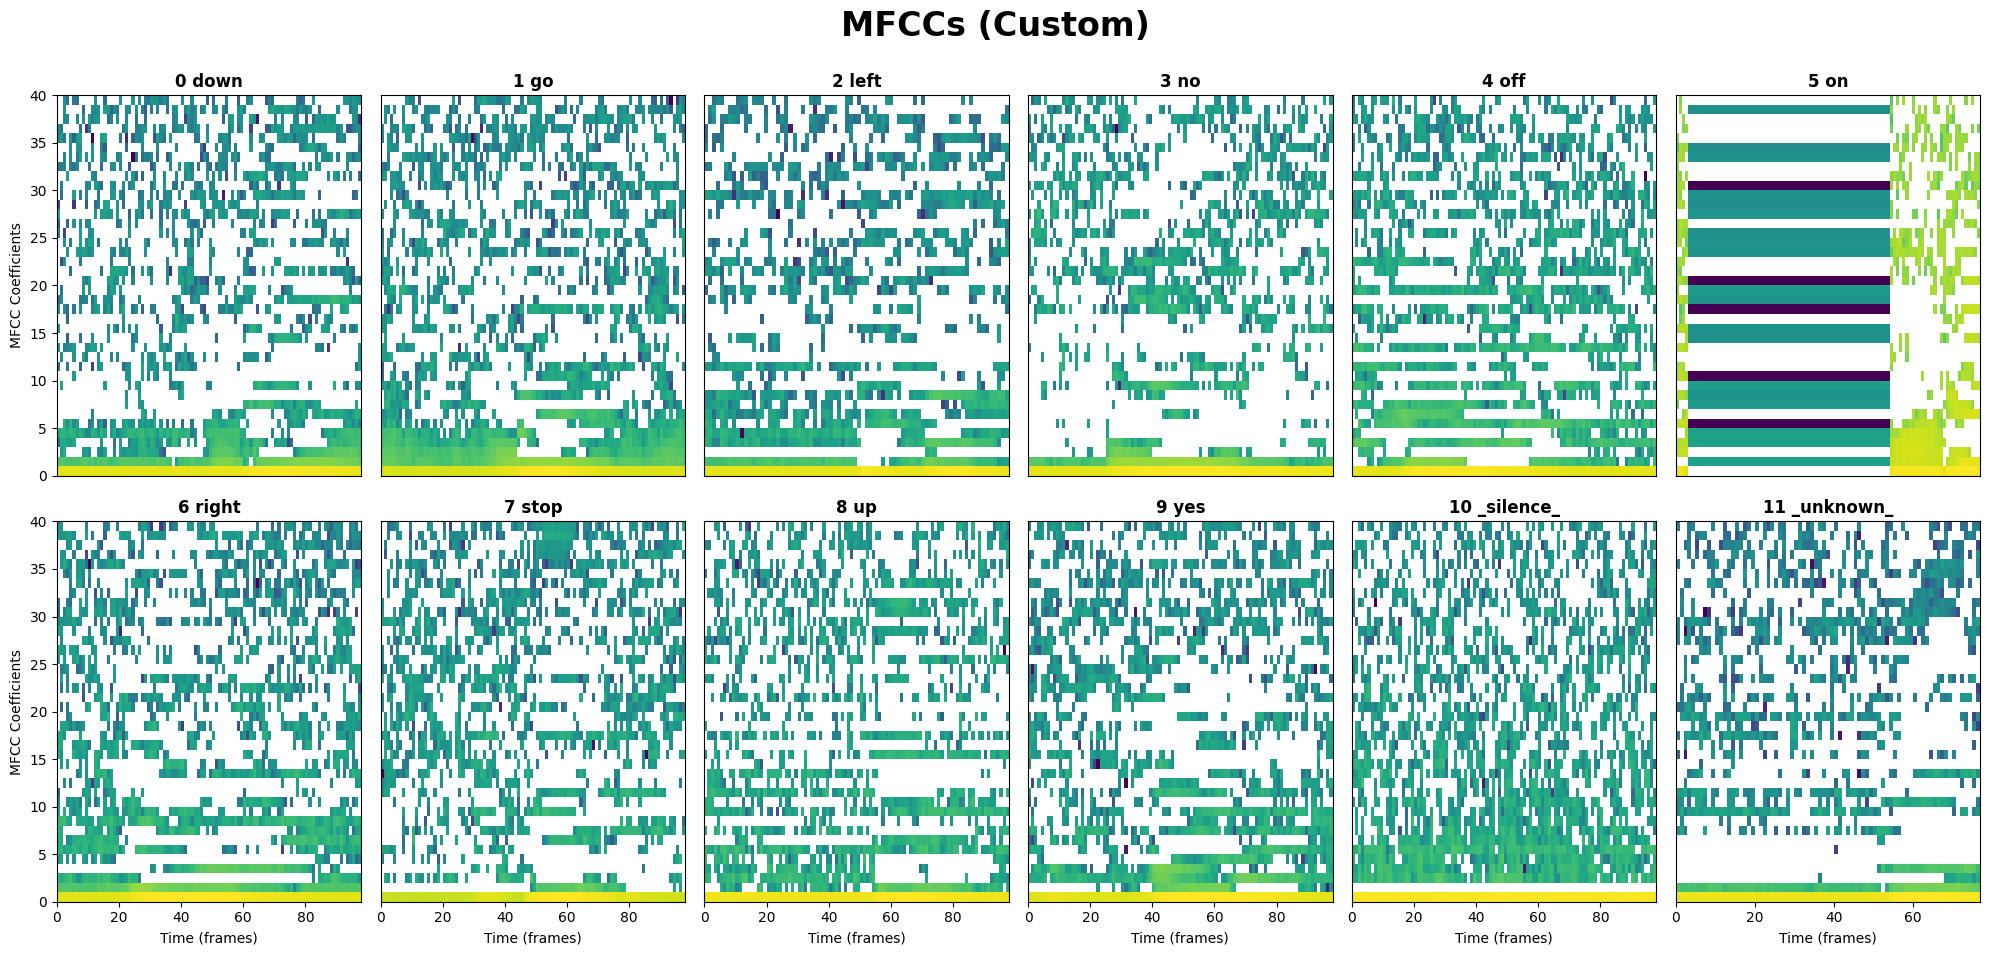

In [87]:
plot_MFCCs(titles, MFCCS_custom, 'MFCCs (Custom)', shape=(20, 10))

/tmp/ipykernel_274362/2209637480.py:59: RuntimeWarning: invalid value encountered in log
  log_spec = np.log(mfcc.T + np.finfo(float).eps)


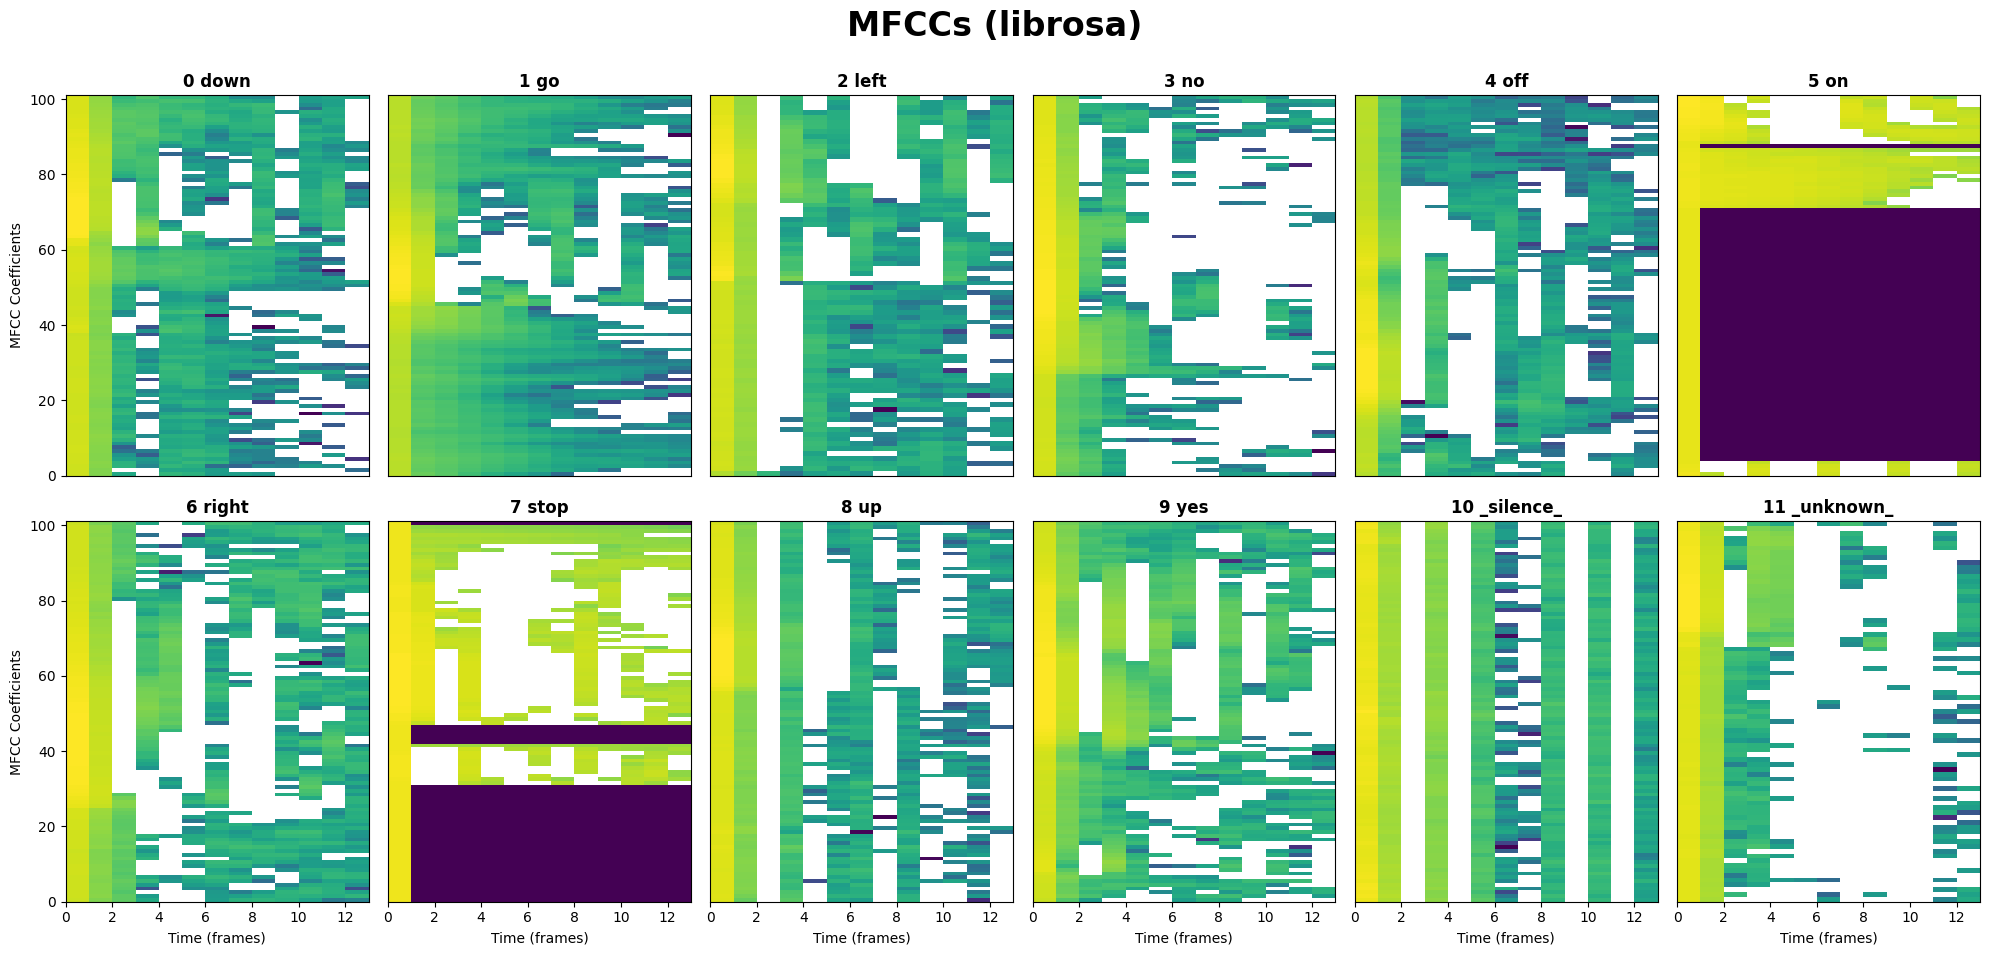

In [88]:
plot_MFCCs(titles, MFCCs_librosa, 'MFCCs (librosa)', shape=(20, 10))

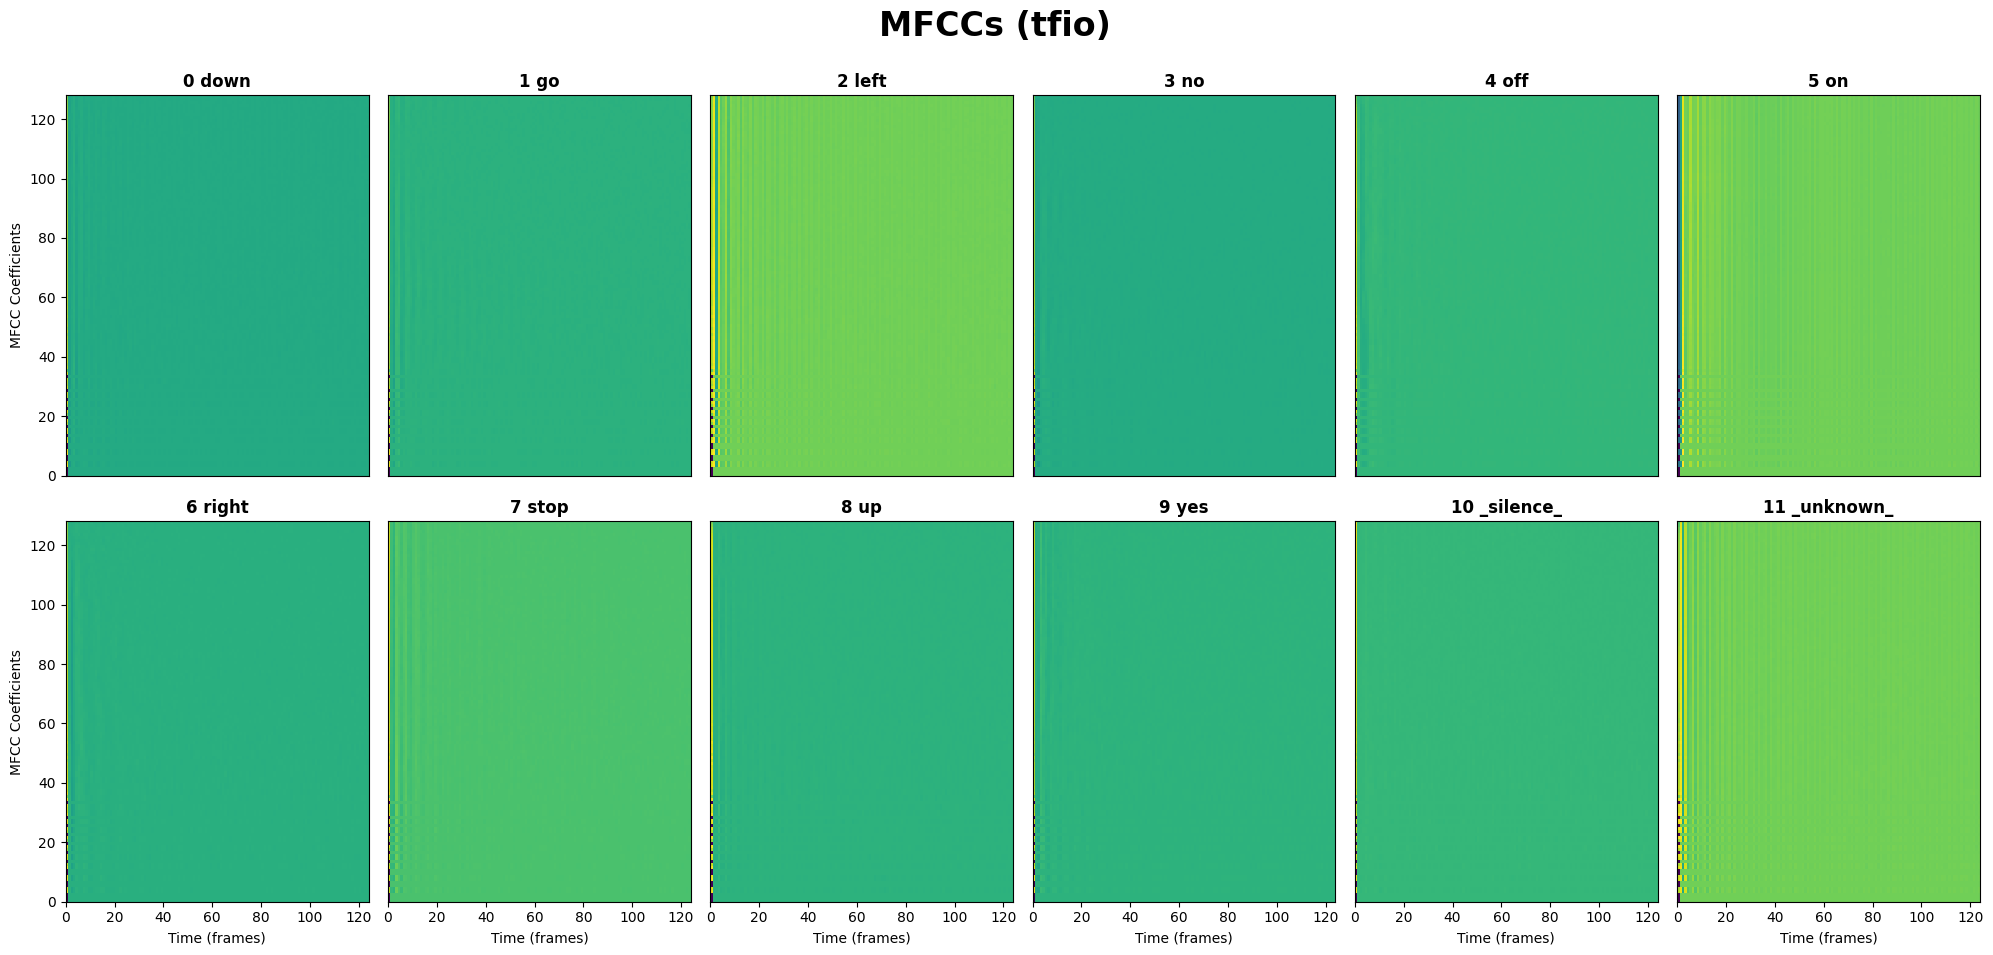

In [85]:
plot_MFCCs(titles, MFCCs, 'MFCCs (tfio)', shape=(20, 10))

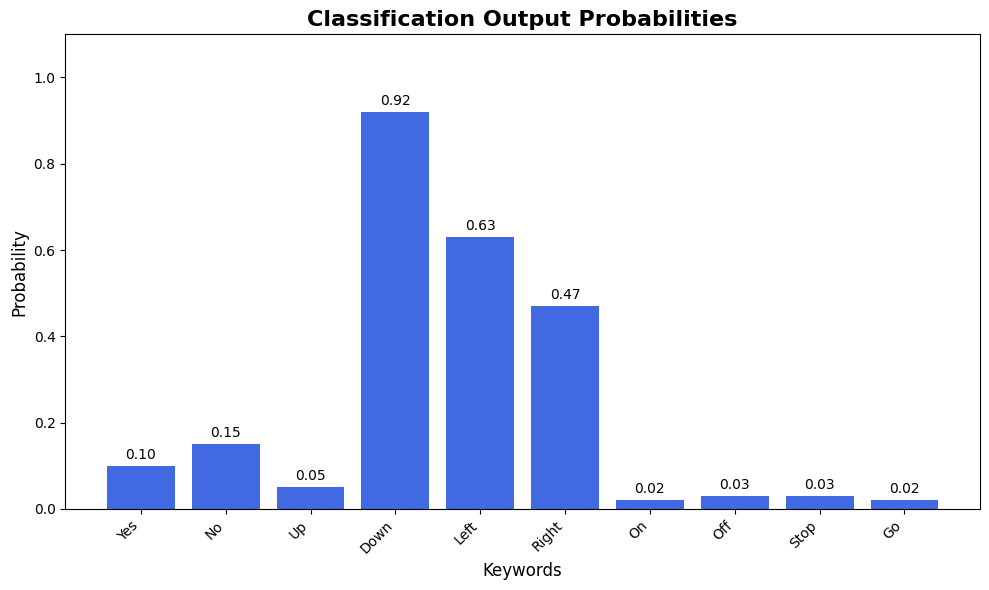

In [90]:

def plot_classification_output(probs, labels, title="Classification Output Probabilities"):
    # Create a bar chart for the classification probabilities
    fig, ax = plt.subplots(figsize=(8, 8))

    # Bar chart with probabilities on the y-axis and labels (keywords) on the x-axis
    bars = ax.bar(labels, probs, color='royalblue')

    # Add a title and labels to the axes
    ax.set_title(title, fontsize=16, weight='bold')
    ax.set_xlabel("Keywords", fontsize=12)
    ax.set_ylabel("Probability", fontsize=12)
    
    # Add probability values on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    # Set y-axis limits for better readability
    ax.set_ylim(0, 1.1)  # Assuming probability is between 0 and 1

    plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
# Probabilities for 10 keywords
probs = np.array([0.10, 0.15, 0.05, 0.92, 0.63, 0.47, 0.02, 0.03, 0.03, 0.02])

# Corresponding labels for the keywords
labels = ['Yes', 'No', 'Up', 'Down', 'Left', 'Right', 'On', 'Off', 'Stop', 'Go']

# Visualize the classification output
plot_classification_output(probs, labels)